In [1]:
import pandas as pd
import numpy as np
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt

In [2]:
tcs = get_history(symbol='TCS',start=date(2015,1,1),end=date(2016,12,31))
infosys=get_history(symbol='INFY',start=date(2015,1,1),end=date(2016,12,31))
nifty_IT=get_history(symbol='NIFTYIT',start=date(2015,1,1),end=date(2016,12,31),index=True)

In [3]:
print(tcs.head())
print(tcs.tail())

           Symbol Series  Prev Close    Open     High      Low     Last  \
Date                                                                      
2015-01-01    TCS     EQ     2558.25  2567.0  2567.00  2541.00  2550.00   
2015-01-02    TCS     EQ     2545.55  2551.0  2590.95  2550.60  2588.40   
2015-01-05    TCS     EQ     2579.45  2581.0  2599.90  2524.65  2538.10   
2015-01-06    TCS     EQ     2540.25  2529.1  2529.10  2440.00  2450.05   
2015-01-07    TCS     EQ     2446.60  2470.0  2479.15  2407.45  2426.90   

              Close     VWAP   Volume      Turnover  Trades  \
Date                                                          
2015-01-01  2545.55  2548.51   183415  4.674345e+13    8002   
2015-01-02  2579.45  2568.19   462870  1.188740e+14   27585   
2015-01-05  2540.25  2563.94   877121  2.248886e+14   43234   
2015-01-06  2446.60  2466.90  1211892  2.989615e+14   84503   
2015-01-07  2417.70  2433.96  1318166  3.208362e+14  101741   

            Deliverable Volume  

In [4]:
print(infosys.head())
print(infosys.tail())

           Symbol Series  Prev Close     Open     High     Low     Last  \
Date                                                                      
2015-01-01   INFY     EQ     1972.55  1968.95  1982.00  1956.9  1971.00   
2015-01-02   INFY     EQ     1974.40  1972.00  2019.05  1972.0  2017.95   
2015-01-05   INFY     EQ     2013.20  2009.90  2030.00  1977.5  1996.00   
2015-01-06   INFY     EQ     1995.90  1980.00  1985.00  1934.1  1965.10   
2015-01-07   INFY     EQ     1954.20  1965.00  1974.75  1950.0  1966.05   

              Close     VWAP   Volume      Turnover  Trades  \
Date                                                          
2015-01-01  1974.40  1971.34   500691  9.870306e+13   14908   
2015-01-02  2013.20  2003.25  1694580  3.394669e+14   54166   
2015-01-05  1995.90  2004.59  2484256  4.979911e+14   82694   
2015-01-06  1954.20  1954.82  2416829  4.724458e+14  108209   
2015-01-07  1963.55  1962.59  1812479  3.557162e+14   62463   

            Deliverable Volume  

In [5]:
print(nifty_IT.head())
print(nifty_IT.tail())

                Open      High       Low     Close    Volume      Turnover
Date                                                                      
2015-01-01  11214.80  11235.75  11166.35  11215.70   4246150  3.575100e+09
2015-01-02  11214.65  11399.10  11214.65  11372.10  10004862  9.645600e+09
2015-01-05  11369.35  11433.75  11186.95  11248.55   8858018  1.059000e+10
2015-01-06  11186.10  11186.10  10909.00  10959.90  12515739  1.364500e+10
2015-01-07  11013.20  11042.35  10889.55  10916.00  10976356  1.203440e+10
                Open      High       Low     Close    Volume      Turnover
Date                                                                      
2016-12-26  10028.90  10065.75   9979.60  10023.30   5510950  4.446000e+09
2016-12-27   9997.00  10188.65   9994.95  10170.70   7812402  6.465800e+09
2016-12-28  10203.85  10301.10  10177.40  10198.60  10320156  8.102500e+09
2016-12-29  10194.15  10314.35  10183.40  10291.85  13889741  1.097080e+10
2016-12-30  10325.35  104

In [6]:
##Simple Moving Average
def SMA(data,ndays):
    sma = pd.Series(pd.rolling_mean(tcs['Close'],ndays),name='SMA')
    data = data.join(sma)
    return data
# 4 weeks moving average for tcs.
ndays=28 
sma_tcs=SMA(tcs,ndays)
sma_tcs=sma_tcs.dropna()
sma_t=sma_tcs['SMA']
# 4 weeks moving average for Infosys.
n = 28
sma_info=SMA(infosys,n)
sma_info=sma_info.dropna()
sma_inf=sma_info['SMA']
# 4 WEEKS moving avergae for Nifty IT.
N = 28
sma_niftyit=SMA(nifty_IT,N)
sma_niftyit=sma_niftyit.dropna()
sma_nifty=sma_niftyit['SMA']

C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=28,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


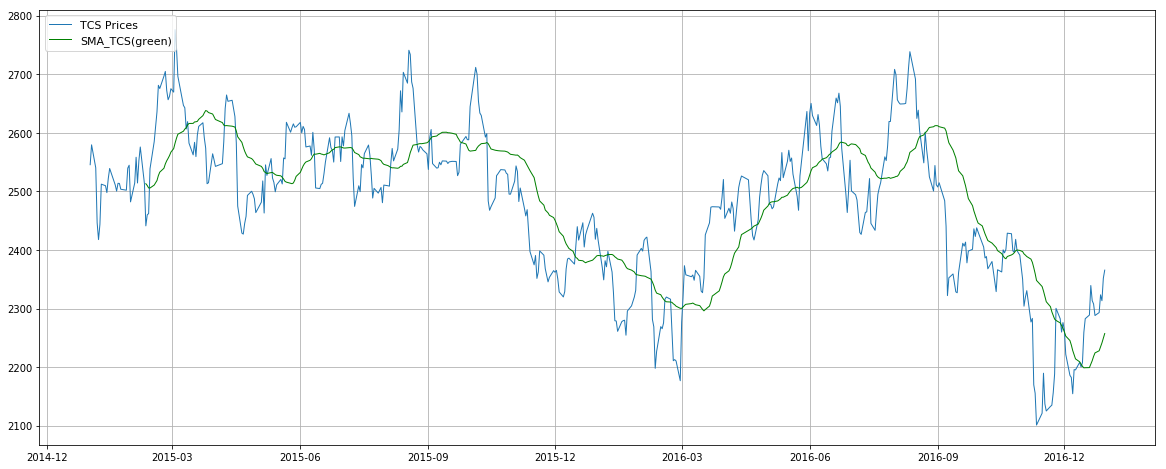

In [7]:
plt.figure(figsize=(20,8))
plt.plot(tcs['Close'],lw=1,label='TCS Prices')
plt.plot(sma_t,'g',lw=1,label='SMA_TCS(green)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)

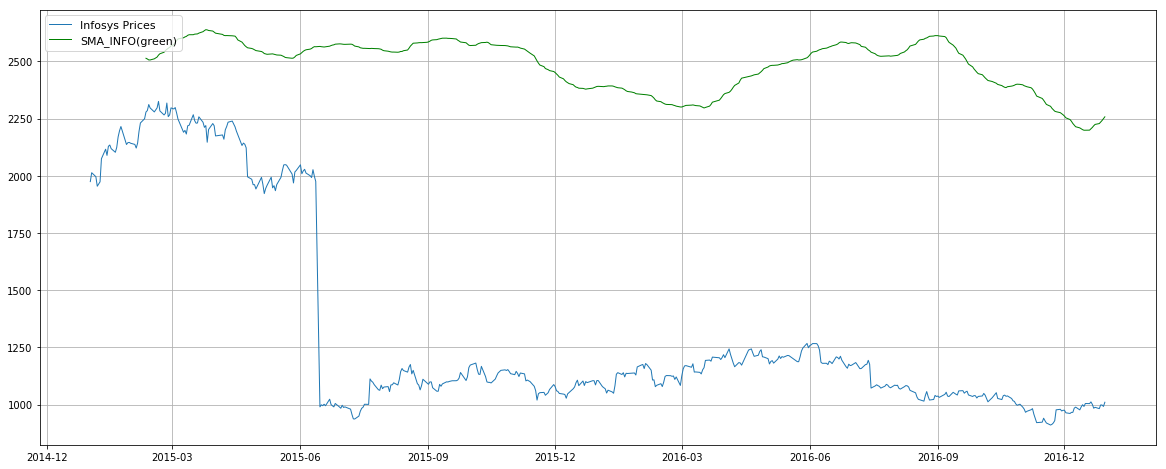

In [8]:
plt.figure(figsize=(20,8))
plt.plot(infosys['Close'],lw=1.0,label='Infosys Prices')
plt.plot(sma_inf,'g',lw=1.0,label='SMA_INFO(green)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)

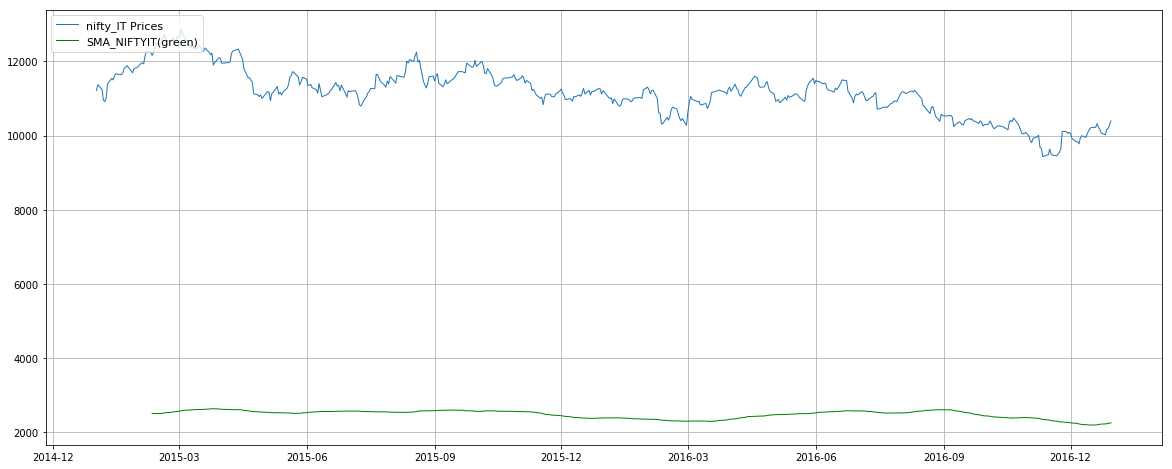

In [9]:
plt.figure(figsize=(20,8))
plt.plot(nifty_IT['Close'],lw=1.0,label='nifty_IT Prices')
plt.plot(sma_nifty,'g',lw=1.0,label='SMA_NIFTYIT(green)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)

In [ ]:
################################
#Note :- I tried my best to solve this question. But it's point 2, of part 1 was confusing. I could not understood clearly. 
# I have never solved problem related to 'Time Series Analysis'. But it was fun to try a new question. Currently, i am studying 
# Deep learning. I would like to hear from your side.